In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\Admin\Documents'

In [5]:
#uploading our clean data from 6.1
df = pd.read_csv(os.path.join(path, 'Feb 23 Gun Laws', 'Data', 'laws_crime_merged_clean.csv'), index_col = False)

In [6]:
#doing the correlation heatmap
df.corr()

Unnamed: 0  Violent crime total  \
Unnamed: 0                               1.000000            -0.093054   
Violent crime total                     -0.093054             1.000000   
Murder and non-negligent manslaughter   -0.076690             0.925489   
Rape                                    -0.062596             0.916226   
Robbery                                 -0.064747             0.954820   
Aggravated assault                      -0.105191             0.991605   
Property crime total                    -0.055595             0.937200   
Burglary                                -0.070208             0.932996   
Larceny/theft                           -0.052404             0.905564   
Motor vehicle theft                     -0.044220             0.926642   
FELONY                                  -0.009292             0.004453   
VIOLENT                                 -0.247402             0.227365   
DEALER                                  -0.199284             0.084495   
PERMIT                                  -0.333249             0.090303   
TRAINING                                -0.247402             0.227365   
REGISTRATION                            -0.027303             0.023262   
UNIVERSAL                               -0.078857             0.079802   
ASSAULT                                 -0.172635             0.170722   
OPENCARRYH                              -0.098071             0.209622   
OPENCARRYPERMITH                         0.028784             0.135259   
PERMITCONCEALED                          0.031578             0.114800   
NOSYG                                   -0.027247             0.007191   
LAWTOTAL                                -0.217548             0.167488   

                                       Murder and non-negligent manslaughter  \
Unnamed: 0                                                         -0.076690   
Violent crime total                                                 0.925489   
Murder and non-negligent manslaughter                               1.000000   
Rape                                                                0.846144   
Robbery                                                             0.902012   
Aggravated assault                                                  0.907938   
Property crime total                                                0.902917   
Burglary                                                            0.885151   
Larceny/theft                                                       0.876052   
Motor vehicle theft                                                 0.888059   
FELONY                                                             -0.020901   
VIOLENT                                                             0.189051   
DEALER                                                              0.061435   
PERMIT                                                              0.067729   
TRAINING                                                            0.189051   
REGISTRATION                                                       -0.001117   
UNIVERSAL                                                           0.061727   
ASSAULT                                                             0.136149   
OPENCARRYH                                                          0.194409   
OPENCARRYPERMITH                                                    0.108008   
PERMITCONCEALED                                                     0.102565   
NOSYG                                                              -0.007076   
LAWTOTAL                                                            0.130579   

                                           Rape   Robbery  Aggravated assault  \
Unnamed: 0                            -0.062596 -0.064747           -0.105191   
Violent crime total                    0.916226  0.954820            0.991605   
Murder and non-negligent manslaughter  0.846144  0.902012            0.907938   
Rape             

In [7]:
df.head()

Unnamed: 0    State    County  Violent crime total  \
0           0  Arizona   Cochise                 47.0   
1           1  Arizona  Coconino                127.0   
2           2  Arizona    Mohave                135.0   
3           3  Arizona     Pinal                197.0   
4           4  Arizona   Yavapai                193.0   

   Murder and non-negligent manslaughter  Rape  Robbery  Aggravated assault  \
0                                    0.0   1.0      3.0                43.0   
1                                    6.0  17.0      1.0               103.0   
2                                    3.0   6.0     19.0               107.0   
3                                    3.0   5.0     18.0               171.0   
4                                    5.0   0.0      4.0               184.0   

   Property crime total  Burglary  ...  PERMIT  TRAINING  REGISTRATION  \
0                 531.0     195.0  ...       0         0             0   
1                 264.0      59.0  ...       0         0             0   
2                1983.0     573.0  ...       0         0             0   
3                1469.0     321.0  ...       0         0             0   
4                 860.0     155.0  ...       0         0             0   

   UNIVERSAL  ASSAULT  OPENCARRYH  OPENCARRYPERMITH  PERMITCONCEALED  NOSYG  \
0          0        0           0                 0                0      0   
1          0        0           0                 0                0      0   
2          0        0           0                 0                0      0   
3          0        0           0                 0                0      0   
4          0        0           0                 0                0      0   

   LAWTOTAL  
0         8  
1         8  
2         8  
3         8  
4         8  

[5 rows x 25 columns]

In [16]:
#gonna rename a column since it's super long
df.rename(columns = {'Murder and non-negligent manslaughter' : 'Murder/NNMS'}, inplace = True)

In [17]:
#first I want to make a subset without all the boolean values as they won't lend themselves well to a correlation map
df_sub = df[['Violent crime total', 'Murder/NNMS', 'Rape', 'Robbery', 'Aggravated assault', 'Property crime total', 'Burglary', 'Larceny/theft', 'Motor vehicle theft', 'LAWTOTAL']]

In [18]:
df_sub.head()

Violent crime total  Murder/NNMS  Rape  Robbery  Aggravated assault  \
0                 47.0          0.0   1.0      3.0                43.0   
1                127.0          6.0  17.0      1.0               103.0   
2                135.0          3.0   6.0     19.0               107.0   
3                197.0          3.0   5.0     18.0               171.0   
4                193.0          5.0   0.0      4.0               184.0   

   Property crime total  Burglary  Larceny/theft  Motor vehicle theft  \
0                 531.0     195.0          273.0                 63.0   
1                 264.0      59.0          180.0                 25.0   
2                1983.0     573.0         1197.0                213.0   
3                1469.0     321.0          987.0                161.0   
4                 860.0     155.0          608.0                 97.0   

   LAWTOTAL  
0         8  
1         8  
2         8  
3         8  
4         8

In [19]:
df_sub.corr()

Violent crime total  Murder/NNMS      Rape   Robbery  \
Violent crime total              1.000000     0.925489  0.916226  0.954820   
Murder/NNMS                      0.925489     1.000000  0.846144  0.902012   
Rape                             0.916226     0.846144  1.000000  0.872383   
Robbery                          0.954820     0.902012  0.872383  1.000000   
Aggravated assault               0.991605     0.907938  0.883812  0.913508   
Property crime total             0.937200     0.902917  0.926285  0.921893   
Burglary                         0.932996     0.885151  0.900481  0.881198   
Larceny/theft                    0.905564     0.876052  0.906131  0.895844   
Motor vehicle theft              0.926642     0.888059  0.875520  0.926767   
LAWTOTAL                         0.167488     0.130579  0.138864  0.141846   

                      Aggravated assault  Property crime total  Burglary  \
Violent crime total             0.991605              0.937200  0.932996   
Murder/NNMS                     0.907938              0.902917  0.885151   
Rape                            0.883812              0.926285  0.900481   
Robbery                         0.913508              0.921893  0.881198   
Aggravated assault              1.000000              0.907544  0.921017   
Property crime total            0.907544              1.000000  0.924024   
Burglary                        0.921017              0.924024  1.000000   
Larceny/theft                   0.873141              0.992506  0.876041   
Motor vehicle theft             0.898125              0.919090  0.914746   
LAWTOTAL                        0.175766              0.138209  0.179936   

                      Larceny/theft  Motor vehicle theft  LAWTOTAL  
Violent crime total        0.905564             0.926642  0.167488  
Murder/NNMS                0.876052             0.888059  0.130579  
Rape                       0.906131             0.875520  0.138864  
Robbery                    0.895844             0.926767  0.141846  
Aggravated assault         0.873141             0.898125  0.175766  
Property crime total       0.992506             0.919090  0.138209  
Burglary                   0.876041             0.914746  0.179936  
Larceny/theft              1.000000             0.873115  0.127789  
Motor vehicle theft        0.873115             1.000000  0.118258  
LAWTOTAL                   0.127789             0.118258  1.000000

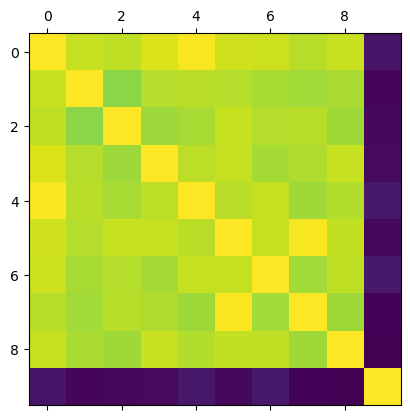

In [20]:
plt.matshow(df_sub.corr())
plt.show()

Text(0.5, 1.0, 'Heatmap')

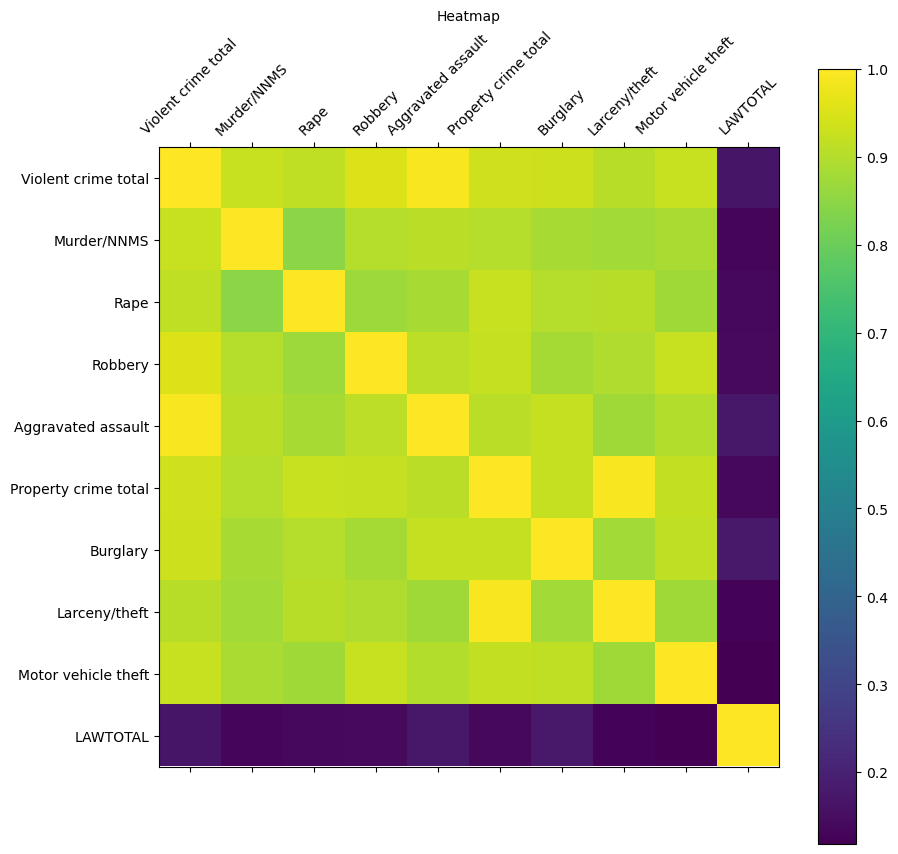

In [21]:
#we need to make this thing more readable
x = plt.figure(figsize=(10, 10))
plt.matshow(df_sub.corr(), fignum=x.number)
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10, rotation=45)
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Heatmap', fontsize=10)

so it looks like most of the variables have a pretty strong positive correlation. That makes sense since it would be strange for a county to have lots of one type of crime and not very much of all other types of crime. We also have a pretty good lead on one of our original questions though: the number of gun laws seems to be very weakly correlated to the amount of crime that happens. 

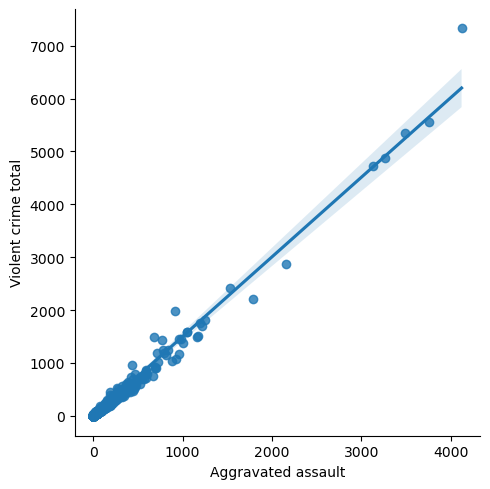

In [23]:
#looks like the most closely correlated variables are aggravated assault/violent crime and larceny-theft/property crime
sns.lmplot(x = 'Aggravated assault', y = 'Violent crime total', data = df)

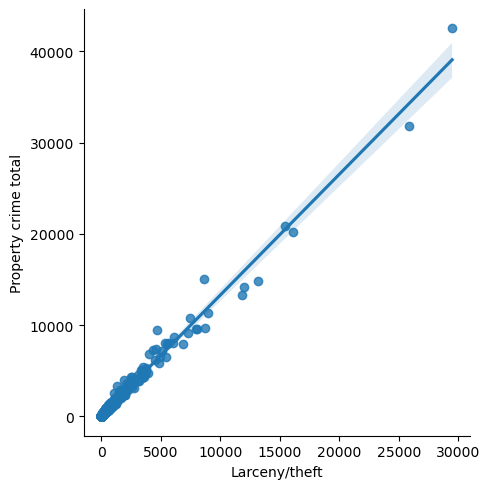

In [24]:
sns.lmplot(x = 'Larceny/theft', y = 'Property crime total', data = df)

so in both cases, it's a really strong positive correlation. That makes sense since the total crime is a sum of the other crimes in that category; what we can pretty much tell from this is that aggravated assault makes up most violent crimes and larceny/theft makes up most of the property crimes. 

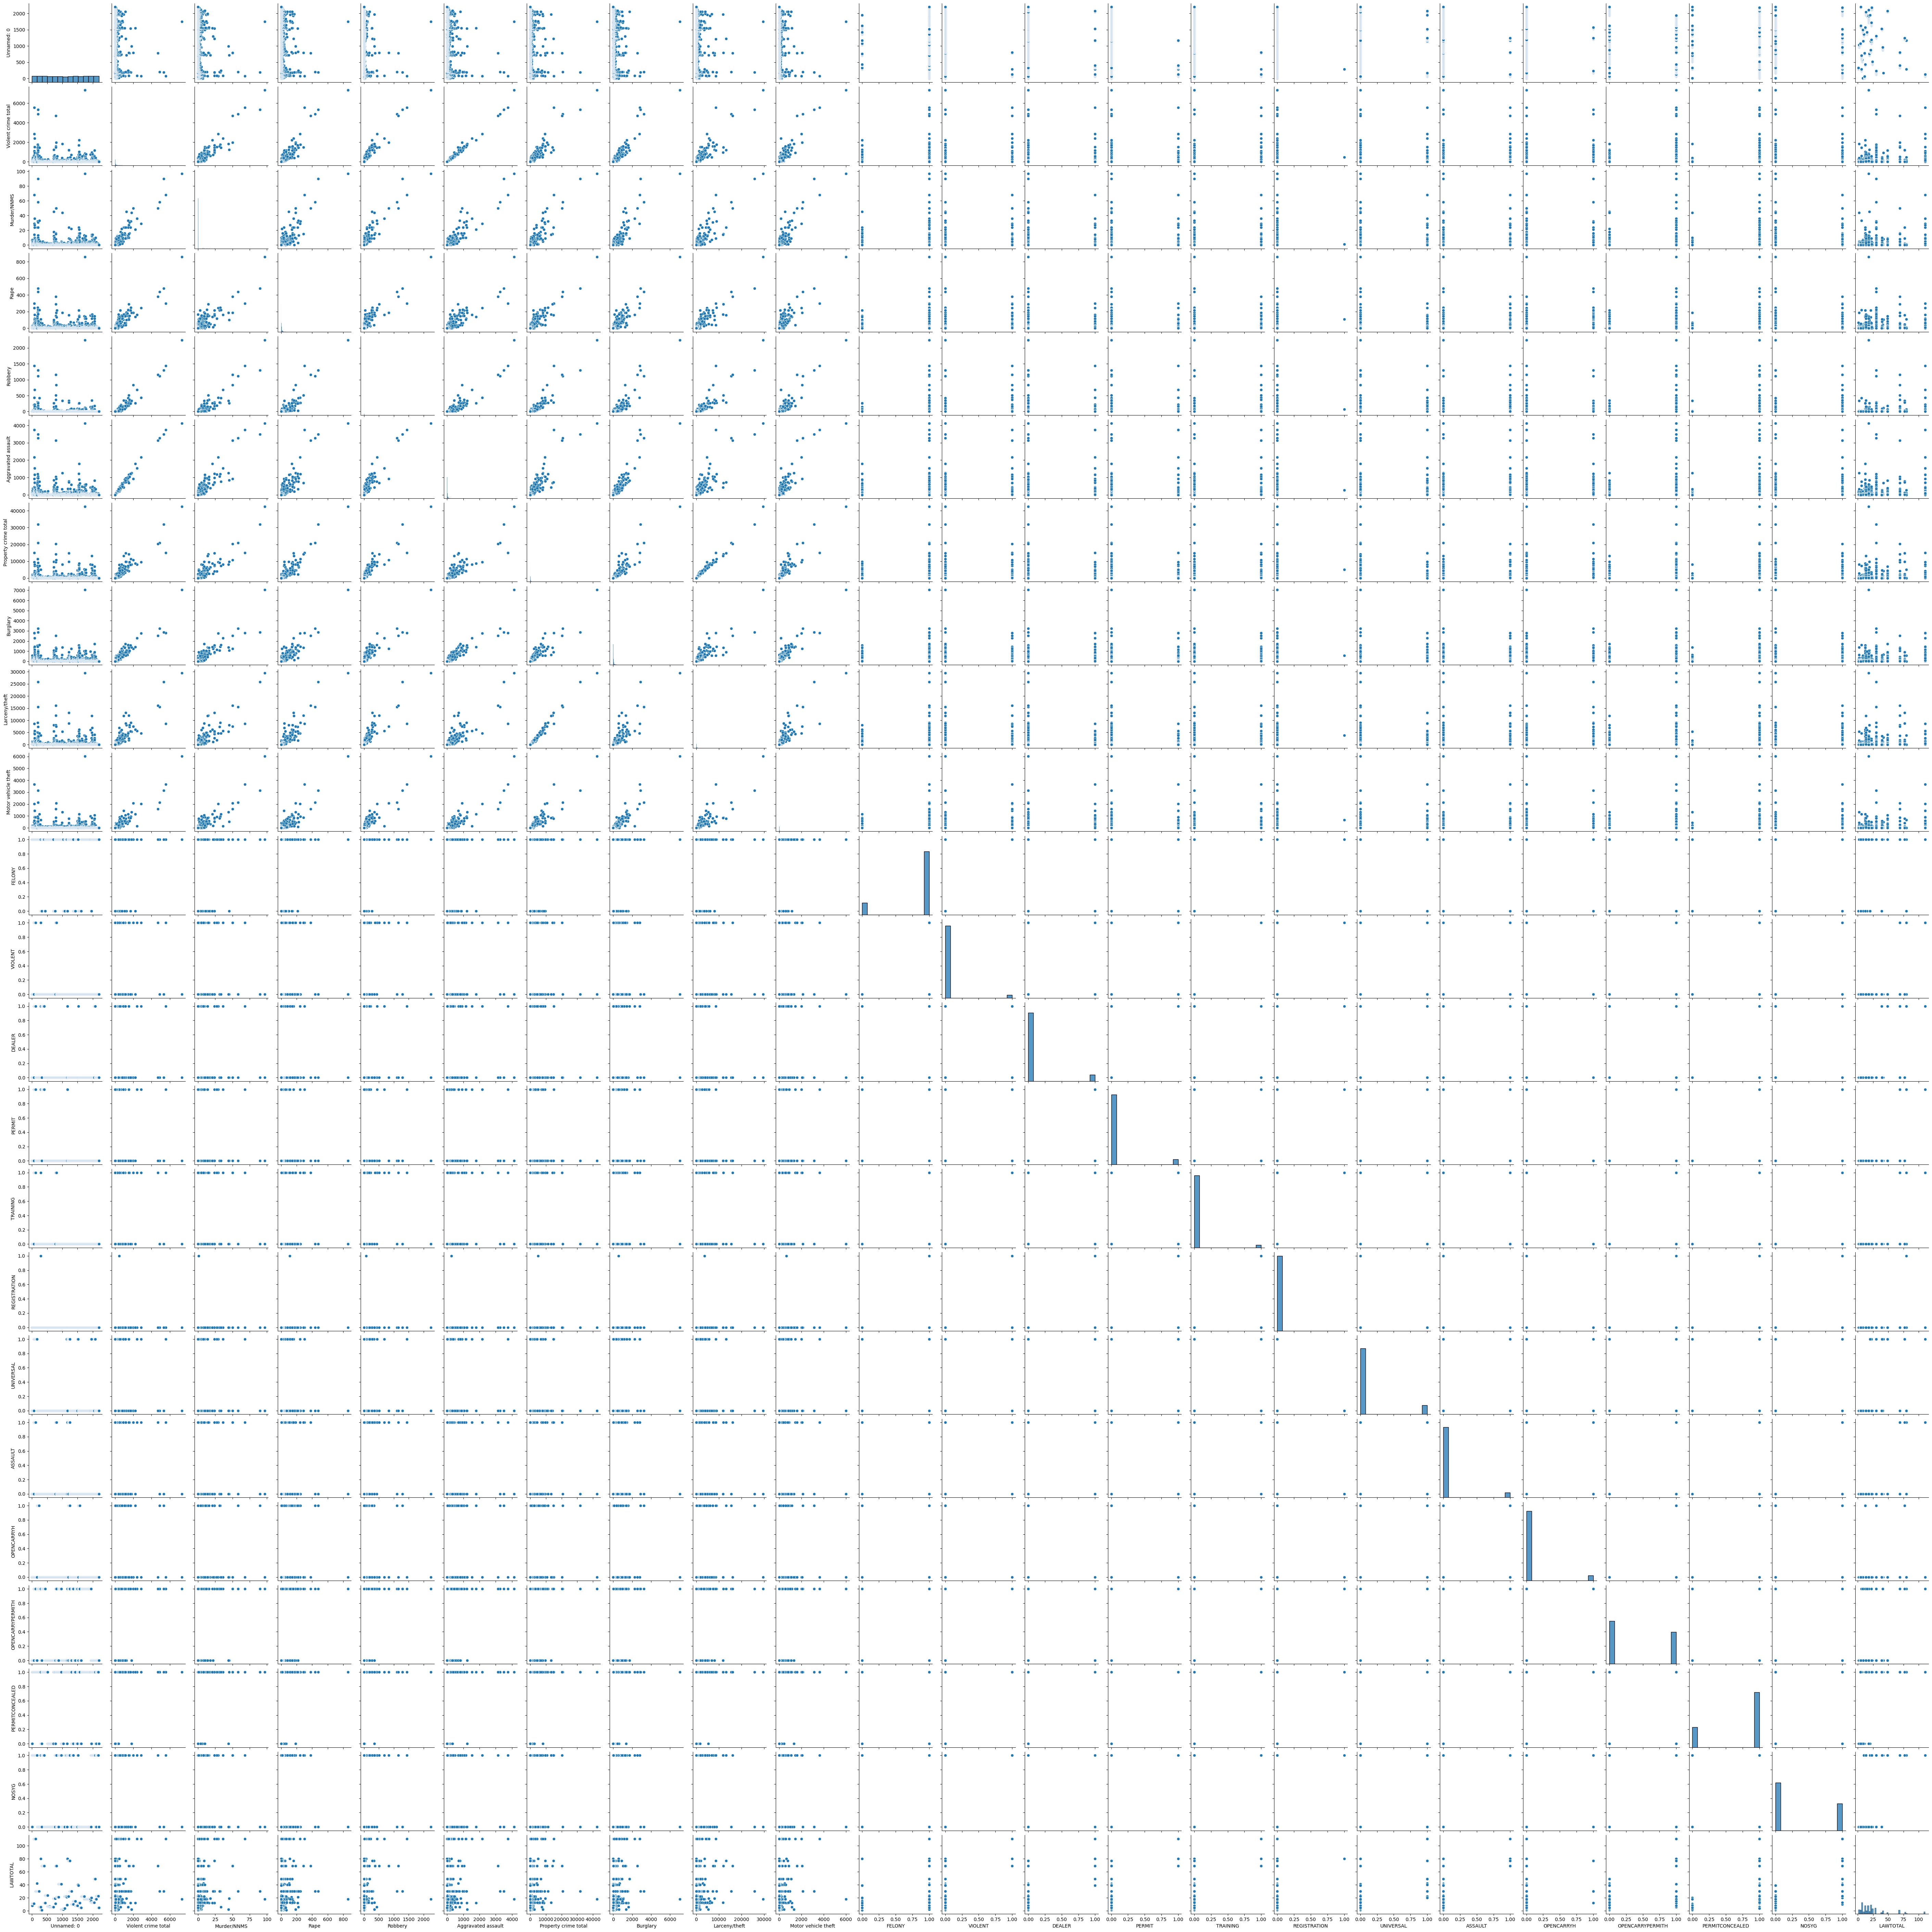

In [25]:
#pairplot of the entire dataset
y = sns.pairplot(df)

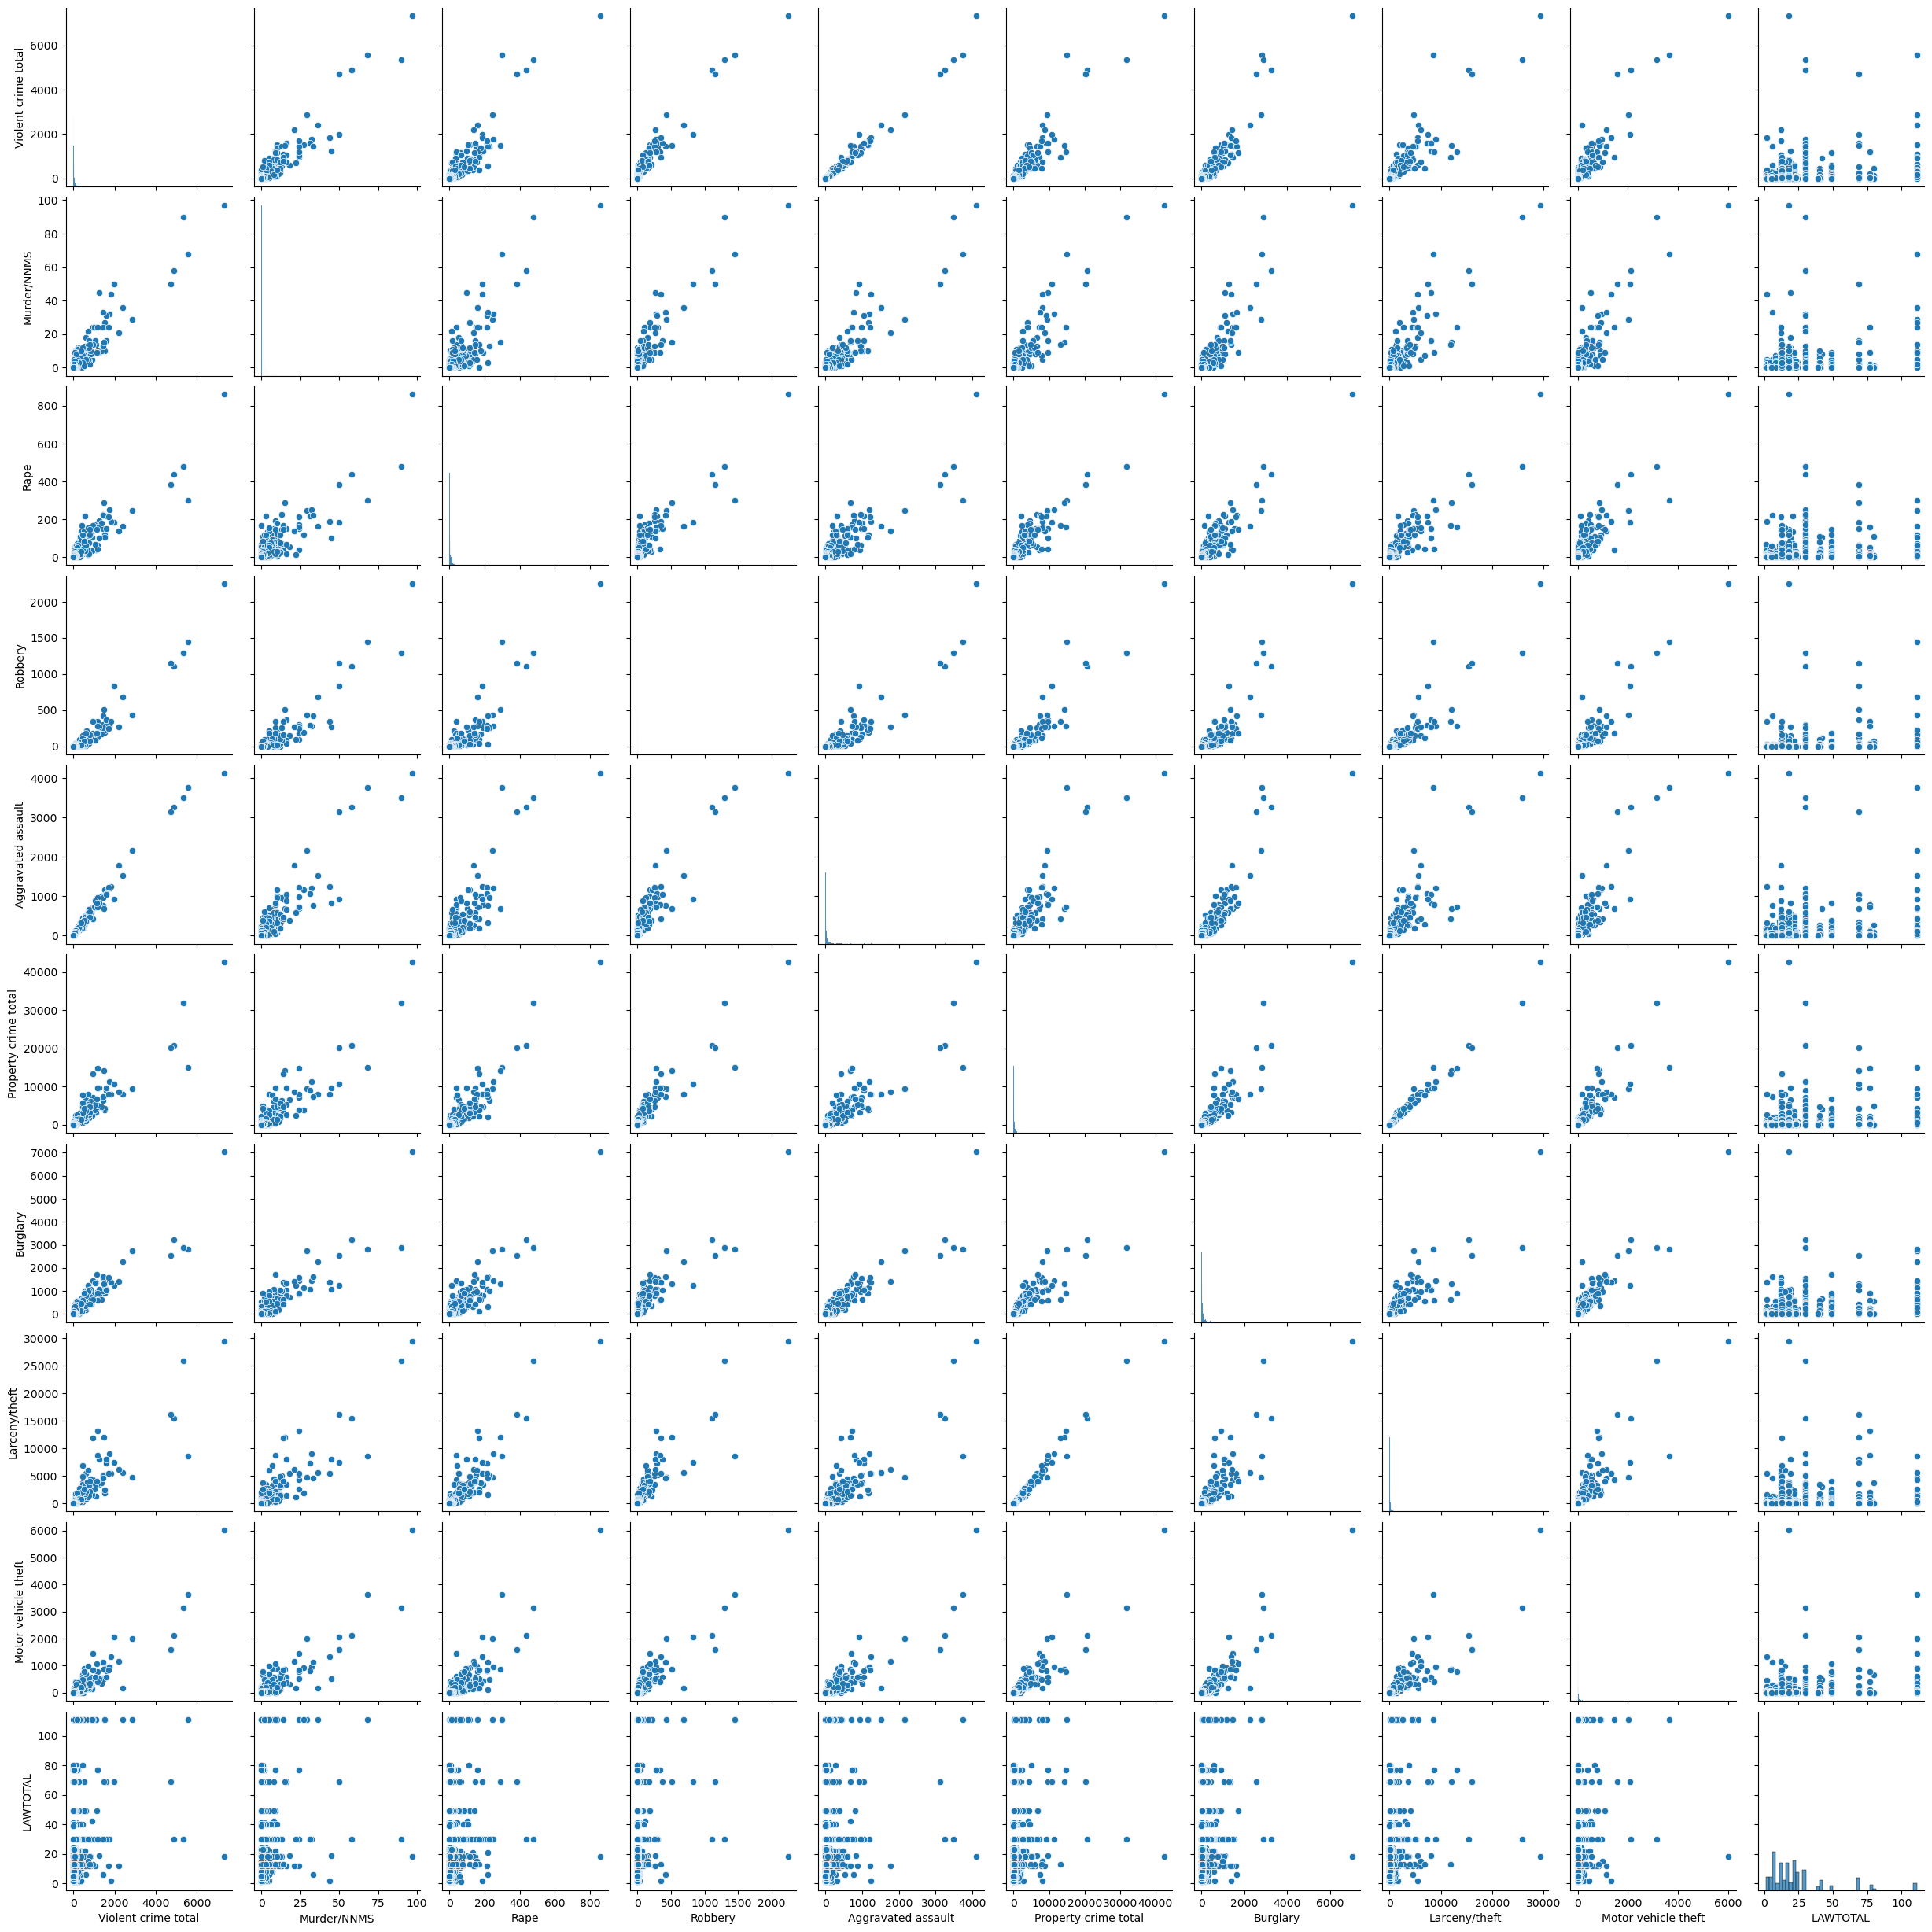

In [26]:
#lol that's a lot, let's see what it looks like without the booleans. Later on it might be useful to create some flags to help get the individual gun laws chosen into categories that better lend themselves to this kind of thing
z = sns.pairplot(df_sub)

it's honestly hard to get a lot from this outside of what we already saw with the heatmap. The only thing I can see that would possibly be a trend is that states with the lower numbers of gun laws tend to have more 'outliers' -- while in most places crime is actually pretty low, the odd very high crime rate seems to be more likely to be in a more pro-2nd amendment state. Maybe if you removed these 'exceptions', the correlation would actually become even lower. 

<AxesSubplot:xlabel='LAWTOTAL', ylabel='Count'>

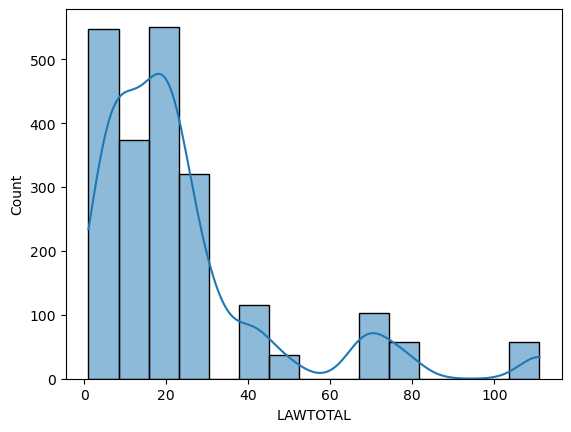

In [28]:
#the categorical plot
sns.histplot(df['LAWTOTAL'], bins = 15, kde = True)

In [29]:
df.loc[df['LAWTOTAL'] < 15, 'Strictness'] = 'Fewer regulations'

In [30]:
df.loc[(df['LAWTOTAL'] >= 15) & (df['LAWTOTAL'] < 30), 'Strictness'] = 'Some regulations'

In [31]:
df.loc[df['LAWTOTAL'] >= 30, 'Strictness'] = 'More regulations'

In [33]:
df['Strictness'].value_counts(dropna = False)

Fewer regulations    835
Some regulations     787
More regulations     539
Name: Strictness, dtype: int64

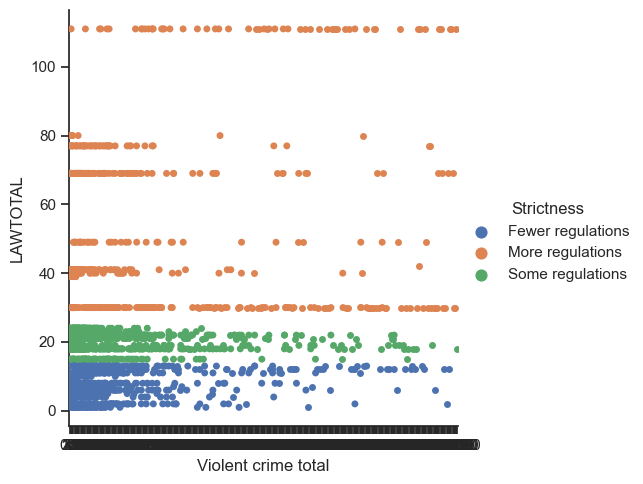

In [34]:
#okay so those parameters look pretty good
#now we make the categorical plot
sns.set(style="ticks")
z = sns.catplot(x="Violent crime total", y="LAWTOTAL", hue="Strictness", data=df)

Again it doesn't look like there's really much of a link at all between number of gun laws and the violent crime rate. I think we're gonna need to do some narrowing down or different categorization or find some other way to look at things. 

In [38]:
#before moving on, I'm gonna make a flag just for fun/practice and see if anything happens
def CC(row):

  if (row['OPENCARRYH'] == 0) and (row['OPENCARRYPERMITH'] == 0) and (row['PERMITCONCEALED'] == 0):
    return 'Constitutional carry'
  else: return 'Non constituitional carry'

In [39]:
df['Const_Carry'] = df.apply(CC, axis=1)

In [40]:
df.head()

Unnamed: 0    State    County  Violent crime total  Murder/NNMS  Rape  \
0           0  Arizona   Cochise                 47.0          0.0   1.0   
1           1  Arizona  Coconino                127.0          6.0  17.0   
2           2  Arizona    Mohave                135.0          3.0   6.0   
3           3  Arizona     Pinal                197.0          3.0   5.0   
4           4  Arizona   Yavapai                193.0          5.0   0.0   

   Robbery  Aggravated assault  Property crime total  Burglary  ...  \
0      3.0                43.0                 531.0     195.0  ...   
1      1.0               103.0                 264.0      59.0  ...   
2     19.0               107.0                1983.0     573.0  ...   
3     18.0               171.0                1469.0     321.0  ...   
4      4.0               184.0                 860.0     155.0  ...   

   REGISTRATION  UNIVERSAL  ASSAULT  OPENCARRYH  OPENCARRYPERMITH  \
0             0          0        0           0                 0   
1             0          0        0           0                 0   
2             0          0        0           0                 0   
3             0          0        0           0                 0   
4             0          0        0           0                 0   

   PERMITCONCEALED  NOSYG  LAWTOTAL         Strictness           Const_Carry  
0                0      0         8  Fewer regulations  Constitutional carry  
1                0      0         8  Fewer regulations  Constitutional carry  
2                0      0         8  Fewer regulations  Constitutional carry  
3                0      0         8  Fewer regulations  Constitutional carry  
4                0      0         8  Fewer regulations  Constitutional carry  

[5 rows x 27 columns]

In [49]:
#this is my workaround to get indivdual states and their CC status lol
df_sub2 = df[['State', 'Const_Carry']]

In [50]:
df_sub2 = df_sub2.drop_duplicates()

In [52]:
df_sub2.shape

(45, 2)

In [54]:
print(df_sub2)

               State                Const_Carry
0            Arizona       Constitutional carry
11          Arkansas  Non constituitional carry
68        California  Non constituitional carry
125         Colorado  Non constituitional carry
170         Delaware  Non constituitional carry
171          Florida  Non constituitional carry
236          Georgia  Non constituitional carry
287           Hawaii  Non constituitional carry
288            Idaho       Constitutional carry
328         Illinois  Non constituitional carry
407          Indiana  Non constituitional carry
435             Iowa  Non constituitional carry
519           Kansas       Constitutional carry
587         Kentucky       Constitutional carry
707        Louisiana  Non constituitional carry
758            Maine       Constitutional carry
774         Maryland  Non constituitional carry
798         Michigan  Non constituitional carry
871        Minnesota  Non constituitional carry
953      Mississippi       Constitutiona

so it looks like states without constitutional carry are going to be way more represented in this dataset

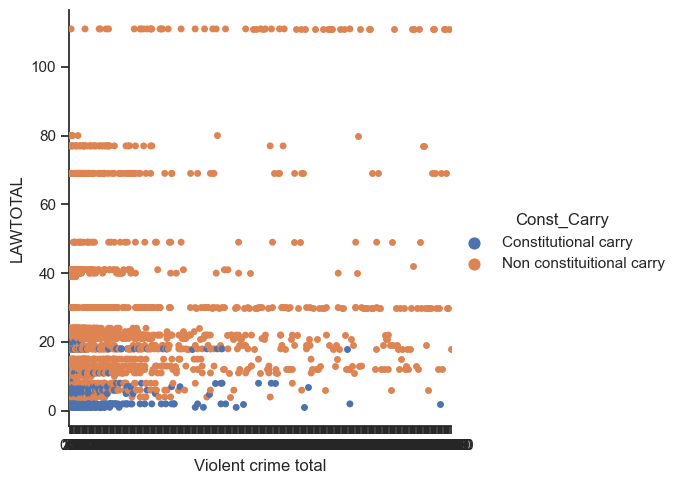

In [55]:
sns.set(style="ticks")
a = sns.catplot(x="Violent crime total", y="LAWTOTAL", hue="Const_Carry", data=df)

So it does seem to look like enacting constitutional carry actually does help deter violent crimes as the data points are clustered more to the left on this chart. It's still kind of hard to tell from the chart alone since we have non-CC represented at a much lower rate, but it's a start. We also have to keep in mind that CC tends to be more popular in rural states, which also tend to have less crime than their urban counterparts since people aren't so closely packed together -- an example of a correlation rather than a causation.

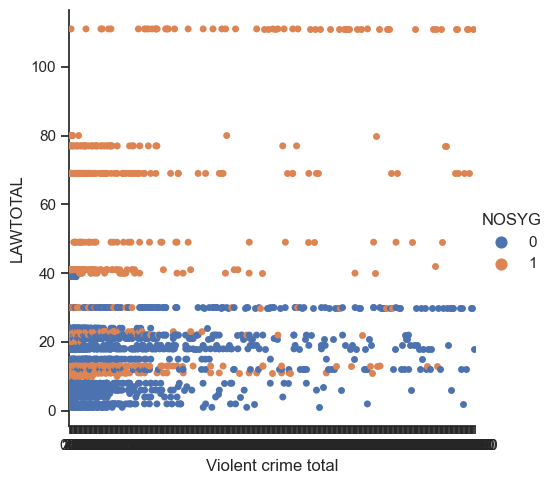

In [56]:
sns.set(style="ticks")
a = sns.catplot(x="Violent crime total", y="LAWTOTAL", hue="NOSYG", data=df)

On the other hand, stand your ground laws actually look like they lead to more violent crimes, but it's really hard to tell from the picture

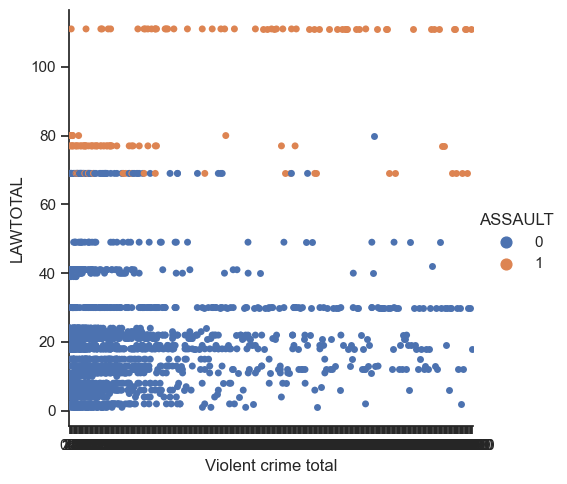

In [57]:
sns.set(style="ticks")
a = sns.catplot(x="Violent crime total", y="LAWTOTAL", hue="ASSAULT", data=df)

Can't tell much from this one since so few states actually have a full-on assault rifle ban

In [58]:
#let's look at the actual numbers
df.groupby('Const_Carry').agg({'Violent crime total': ['mean']})

Violent crime total
                                         mean
Const_Carry                                  
Constitutional carry                25.893570
Non constituitional carry          104.254971

enormous difference!

In [59]:
df.groupby('NOSYG').agg({'Violent crime total': ['mean']})

Violent crime total
                     mean
NOSYG                    
0               86.094203
1               91.093470

Almost no difference here though

In [60]:
df.groupby('ASSAULT').agg({'Violent crime total': ['mean']})


Violent crime total
                       mean
ASSAULT                    
0                 73.065711
1                307.072993

The biggest difference of all, which is crazy because the picture doesn't look like that at all. I'd be willing to bet it's some outliers in the AR-banning states. 

So far: 
-There seems to be no correlation between number of gun laws and crime rates
-More violent crime appears to mean more property crime, and vice versa
-Having constitutional carry is definitely linked to less violent crime, but there may be a confounding variable

Hypotheses: While the number of gun laws doesn't affect crime rates, having constitutional carry and not banning assault rifles do lead to lower crime rates. Property crime and violent crime rates are directly proportionate to one another. 